In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('experiments/test_sim_qhaplo_10k_1ksites_100qtl_Ve0_HYBRID_FEATURE_SELN.csv')
df = df.sort_values(by='feature_index')
df['even_odd'] = [0 if i % 2 == 0 else 1 for i in df['feature_index']]


(array([1728.,   85.,   73.,   47.,   30.,   13.,    8.,    8.,    4.,
           4.]),
 array([3.56883920e-06, 4.47721090e-02, 8.95406491e-02, 1.34309189e-01,
        1.79077729e-01, 2.23846269e-01, 2.68614810e-01, 3.13383350e-01,
        3.58151890e-01, 4.02920430e-01, 4.47688970e-01]),
 <BarContainer object of 10 artists>)

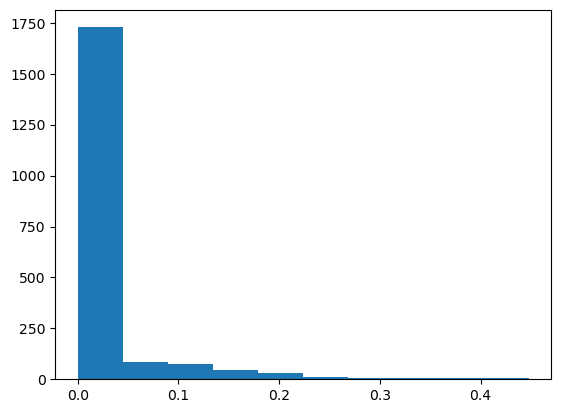

In [5]:
df.head(n=10)
plt.hist(df['importance'])

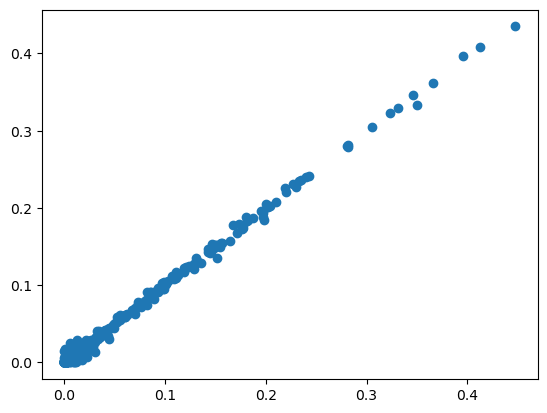

In [6]:
df_even = df[df["even_odd"] == 1]
df_odd = df[df["even_odd"] == 0]

plt.scatter(df_odd['importance'], df_even['importance'])


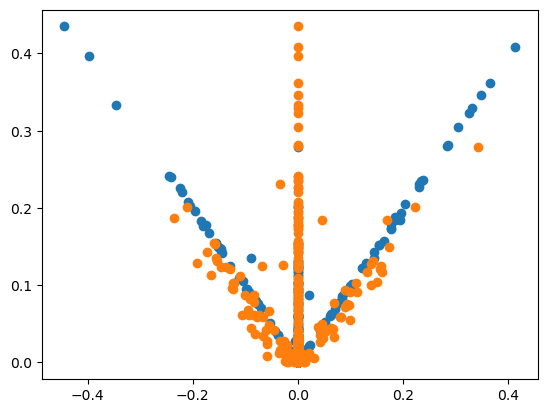

In [8]:
eff = pd.read_csv('test_sim_qhaplo_10k_1ksites_100qtl_Ve0_eff.txt', sep=' ')

trait1 = eff[eff['trait']==1]
trait2 = eff[eff['trait']==2]

plt.scatter(trait1['add_eff'], df_even['importance'])
plt.scatter(trait2['add_eff'], df_even['importance'])

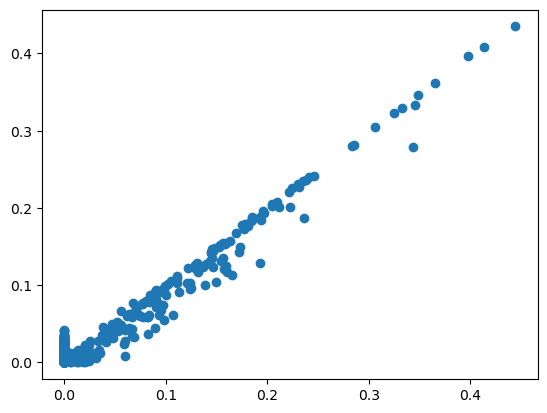

In [9]:
max_eff = pd.Series(
    np.maximum(abs(trait1['add_eff']).values, abs(trait2['add_eff'].values)),
    index=trait1.index
)
len(max_eff)
plt.scatter(max_eff, df_even['importance'])

In [10]:
trait2.head()

,trait,locus,add_eff,epi_loc,epi_eff,sfs
1000,2,1,0.000000,16.0,0.170149,0.4961
1001,2,2,0.008802,58.0,-0.357121,0.4962
1002,2,3,0.000000,52.0,-0.313392,0.4940
1003,2,4,0.000000,89.0,0.189631,0.5015
1004,2,5,0.000000,19.0,-0.116641,0.5104
